___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
import scipy.stats as stats

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [6]:
ad_data  = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [7]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [12]:
ad_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


** Use info and describe() on ad_data**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

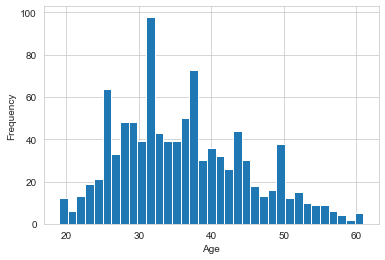

In [16]:
sns.set_style('whitegrid')
ad_data['Age'].plot.hist(bins=35)
plt.xlabel('Age')

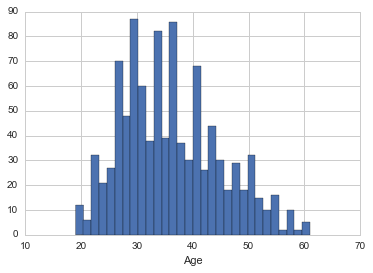

**Create a jointplot showing Area Income versus Age.**

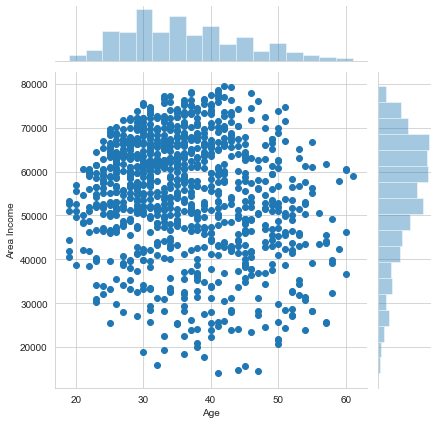

In [19]:
sns.jointplot(x="Age",y="Area Income", data=ad_data, kind='scatter')


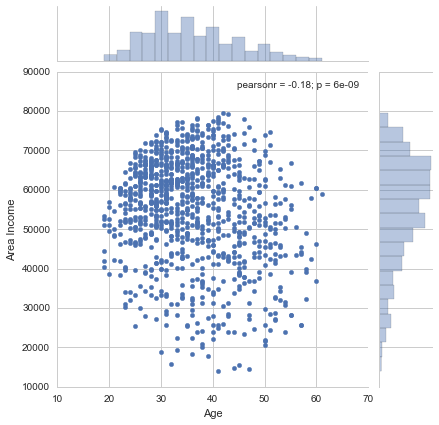

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

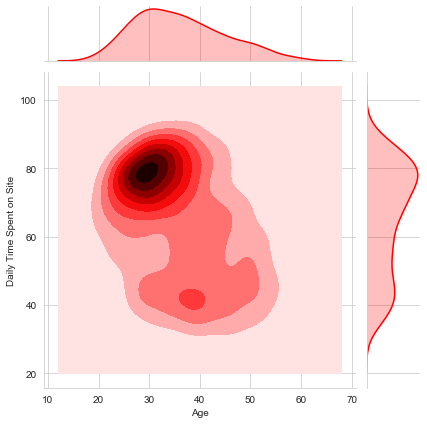

In [21]:
sns.jointplot(x="Age",y="Daily Time Spent on Site", data=ad_data,color='red', kind='kde')


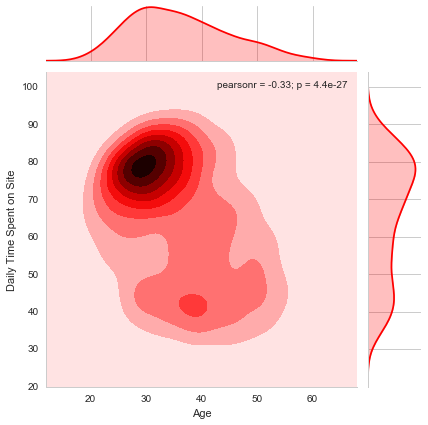

In [22]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

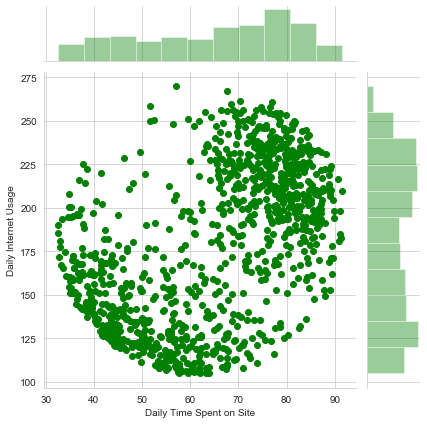

In [23]:
sns.jointplot(x="Daily Time Spent on Site",y="Daily Internet Usage", data=ad_data,color='green')


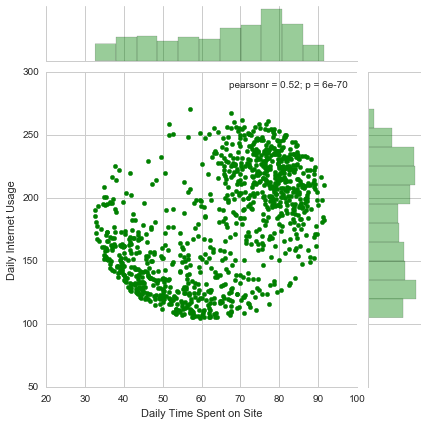

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

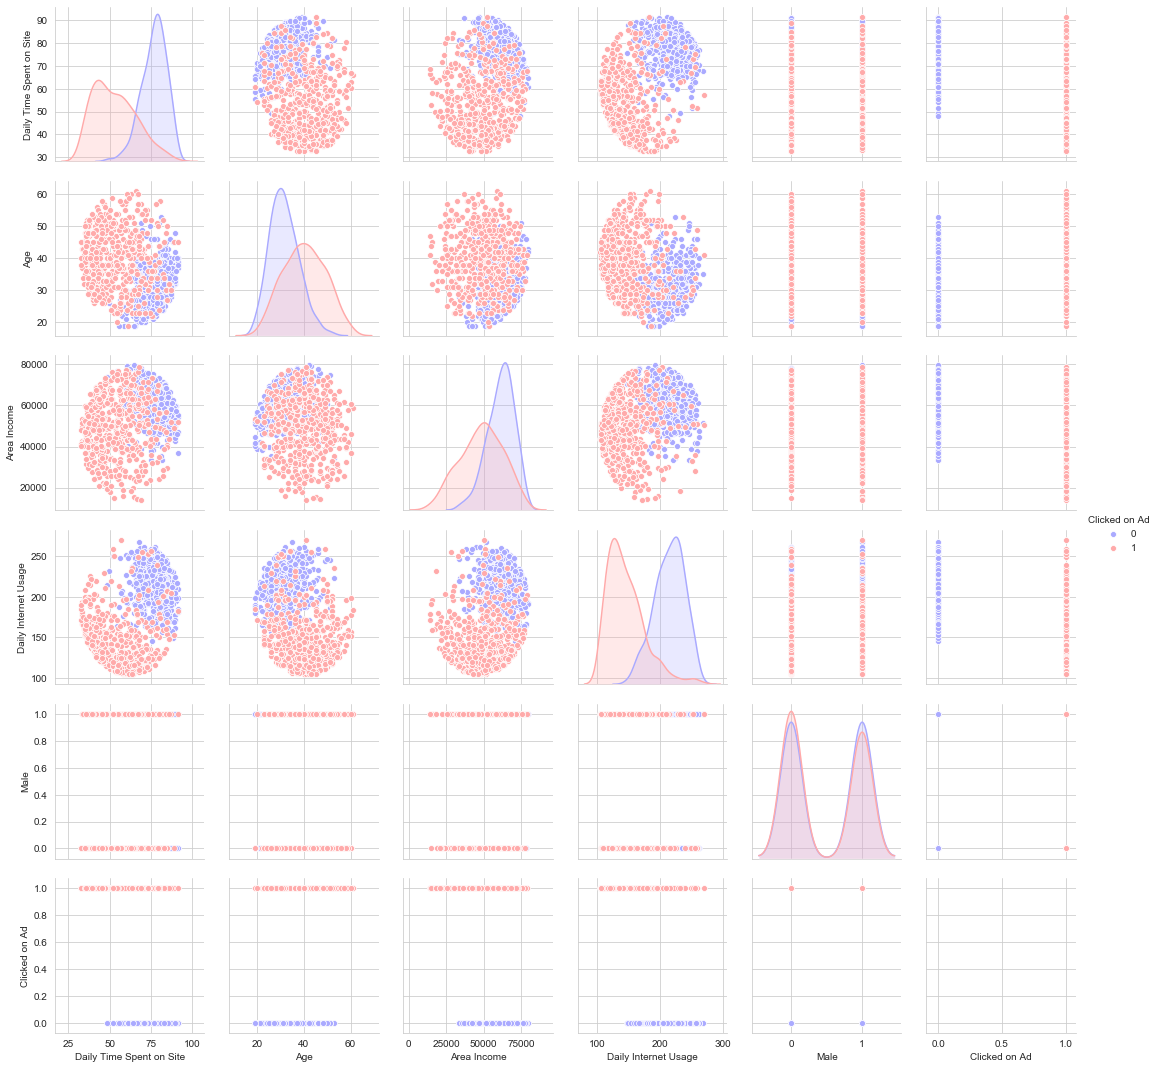

In [25]:
sns.pairplot(ad_data, hue= "Clicked on Ad", palette="bwr")


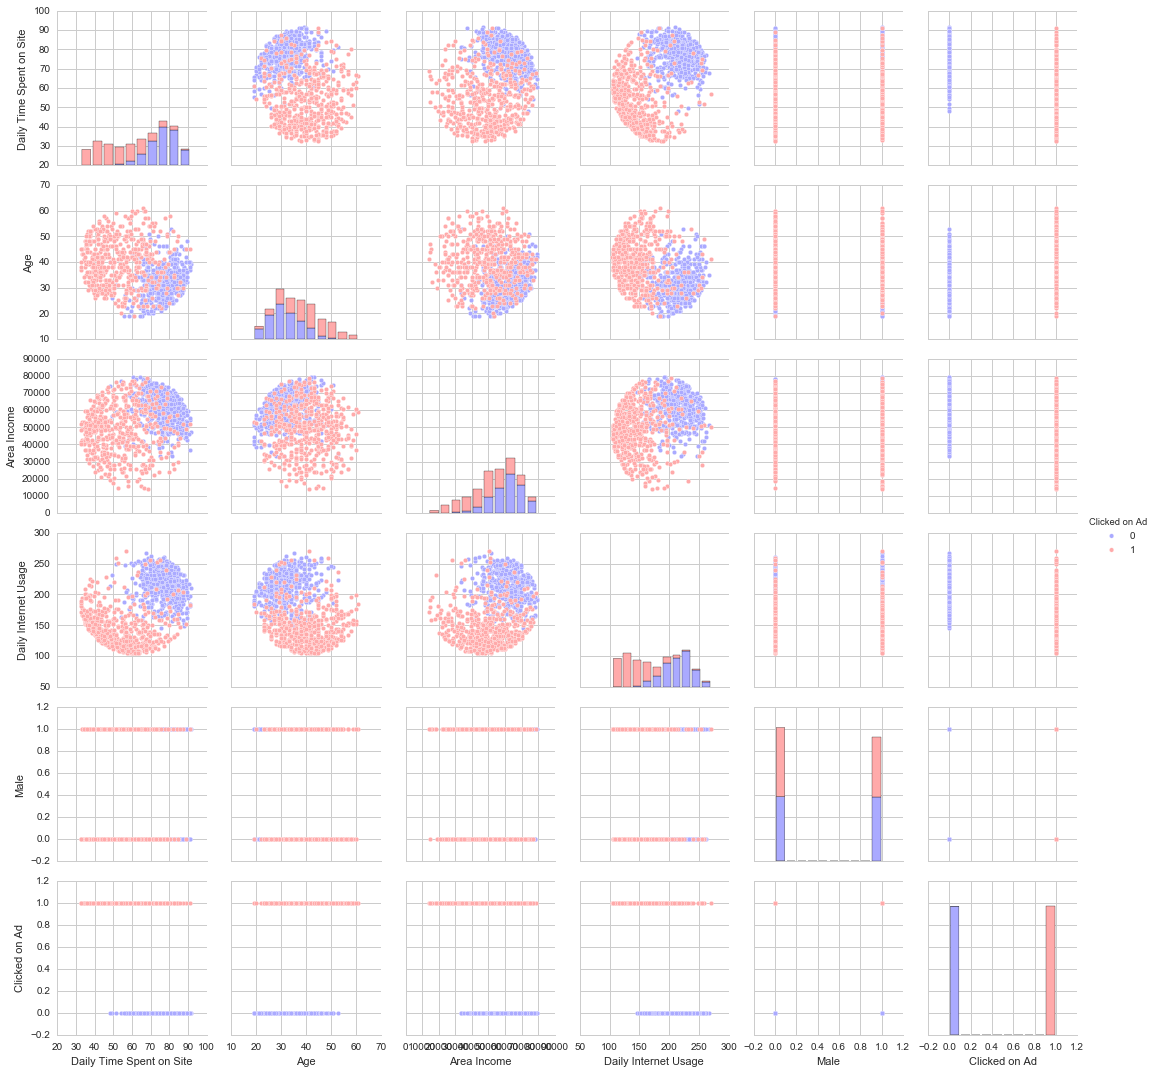

In [50]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [56]:
ad_data["Area Income_Z"]= stats.zscore(ad_data["Area Income"])
ad_data["Daily Internet Usage_Z"]= stats.zscore(ad_data["Daily Internet Usage"])
ad_data["Daily Time Spent on Site_Z"]= stats.zscore(ad_data["Daily Time Spent on Site"])
ad_data["Age_Z"]= stats.zscore(ad_data["Age"])

In [61]:
ad_data

,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Area Income_Z,Daily Internet Usage_Z,Daily Time Spent on Site_Z,Age_Z
0,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0.509691,1.734030,0.249267,-0.114905
1,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1.002530,0.313805,0.961132,-0.570425
2,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0.356949,1.287589,0.282083,-1.139826
3,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,-0.014456,1.501580,0.577432,-0.798185
4,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1.408868,1.038731,0.212664,-0.114905
...,...,...,...,...,...,...,...,...,...,...
995,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,1.222006,0.651314,0.502963,-0.684305
996,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0.953329,-1.038735,-0.864601,1.023896
997,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,-0.938570,-1.358924,-0.843775,1.707176
998,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,-0.975484,0.181172,-0.596389,-1.936986


In [62]:
ad_data.drop(['Ad Topic Line','City', 'Country','Timestamp'], axis=1, inplace = True)

In [63]:
ad_data

,Male,Clicked on Ad,Area Income_Z,Daily Internet Usage_Z,Daily Time Spent on Site_Z,Age_Z
0,0,0,0.509691,1.734030,0.249267,-0.114905
1,1,0,1.002530,0.313805,0.961132,-0.570425
2,0,0,0.356949,1.287589,0.282083,-1.139826
3,1,0,-0.014456,1.501580,0.577432,-0.798185
4,0,0,1.408868,1.038731,0.212664,-0.114905
...,...,...,...,...,...,...
995,1,1,1.222006,0.651314,0.502963,-0.684305
996,1,1,0.953329,-1.038735,-0.864601,1.023896
997,1,1,-0.938570,-1.358924,-0.843775,1.707176
998,0,0,-0.975484,0.181172,-0.596389,-1.936986


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [64]:
ad_data.columns

Index(['Male', 'Clicked on Ad', 'Area Income_Z', 'Daily Internet Usage_Z',
       'Daily Time Spent on Site_Z', 'Age_Z'],
      dtype='object')

** Split the data into training set and testing set using train_test_split**

In [65]:
X= ad_data[['Daily Time Spent on Site_Z', 'Age_Z', 'Area Income_Z','Daily Internet Usage_Z','Male']]
y= ad_data['Clicked on Ad']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()

** Train and fit a logistic regression model on the training set.**

In [70]:
logmodel.fit(X_train, y_train)

/Users/mk/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [71]:
prediction = logmodel.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

** Create a classification report for the model.**

In [72]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, prediction)) #model with Zscore 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       146
           1       0.99      0.95      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,prediction)

array([[149,   8],
       [ 15, 128]])

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



## Great Job!